# وارد کردن کتابخانه ها

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from matplotlib import rcParams
from tabulate import tabulate
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import arabic_reshaper
from bidi.algorithm import get_display
from IPython.display import display, HTML

# تنظیم فونت فارسی برای نمودارها

In [5]:
def configure_farsi_font():
    rcParams['font.family'] = 'Tahoma' 
    rcParams['axes.unicode_minus'] = False

configure_farsi_font()

def reshape_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)



# تابع خواندن فایل اکسل

In [6]:
def read_excel_file(file_path):
    try:
        return pd.read_excel(file_path)
    except FileNotFoundError:
        print(f"Error: File not found '{file_path}'")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: Empty file '{file_path}'")
        return None
    except Exception as e:
        print(f"Error reading file '{file_path}': {e}")
        return None

# تابع بررسی داده‌ها و مدیریت مقادیر خالی

In [7]:
def inspect_dataframe(df, file_path):
    print(f"\nInspecting data in file: {file_path}")
    print(f"Total number of rows: {len(df)}")

    rows_with_nan = df[df.isnull().any(axis=1)]
    print(f"Number of rows with missing values (NaN): {len(rows_with_nan)}")
    if not rows_with_nan.empty:
        output_dir = os.path.join(os.path.dirname(file_path), "missing_data")
        os.makedirs(output_dir, exist_ok=True)
        output_path = os.path.join(output_dir, f"{os.path.basename(file_path)}_missing_data.xlsx")
        rows_with_nan.to_excel(output_path, index=False)
        print(f"Rows with missing values saved to: {output_path}")

    # جایگزینی مقادیر خالی در ستون‌های خاص
    if 'description' in df.columns:
        df['description'] = df['description'].fillna('نام کالا نا مشخص')

    for col in ['weight(kg)', 'fee(usd)', 'fee(Rial)']:
        if col in df.columns:
            df[col] = df[col].fillna(0)

    print("\nData summary:")
    print(df.describe(include='all'))
    return df

# تابع پردازش داده‌ها

In [8]:
def process_files(file_paths):
    data_frames = []
    for file_path in file_paths:
        df = read_excel_file(file_path)
        if df is not None:
            df = inspect_dataframe(df, file_path)
            data_frames.append(df)
    return data_frames

# مسیر فایل ها

In [9]:
import_file_paths = [
    r'./imp-cust-ctry-tariff-1400.xlsx',
    r'./imp-cust-ctry-tariff-1401.xlsx',
    r'./imp-cust-ctry-tariff-1402.xlsx'
]

export_file_paths = [
    r'./exp-cust-ctry-tariff-1400.xlsx',
    r'./exp-cust-ctry-tariff-1401.xlsx',
    r'./exp-cust-ctry-tariff-1402.xlsx'
]


# پردازش داده‌ها

In [10]:
imported_data_frames = process_files(import_file_paths)
exported_data_frames = process_files(export_file_paths)


Inspecting data in file: C:\Users\Max Computer\Desktop\gomrok\imp-cust-ctry-tariff-1400.xlsx
Total number of rows: 152995
Number of rows with missing values (NaN): 202
Rows with missing values saved to: C:\Users\Max Computer\Desktop\gomrok\missing_data\imp-cust-ctry-tariff-1400.xlsx_missing_data.xlsx

Data summary:
                          custom_name country     tarrif no description  \
count                          152995  152995  1.529950e+05      152995   
unique                             92     112           NaN        4683   
top     منطقه ويژه اقتصادي شهيد رجايي     چين           NaN        ساير   
freq                            36796   45454           NaN        1732   
mean                              NaN     NaN  6.531857e+07         NaN   
std                               NaN     NaN  2.556520e+07         NaN   
min                               NaN     NaN  1.012100e+06         NaN   
25%                               NaN     NaN  3.908909e+07         NaN   
50%    

باتوجه به اینکه دوتا از فایلهای ورودی دارایNAN هستند با برررسی انها متوجه شدم که یک سری ردیف ها در ستون DESCRIPTION دارای قسمتهای خالی است و برای همین هر جا NAN داشتم  گفتم با عبارت "نام کالا مشخص نیست" جایگزین کند

# چاپ ستون های دیتا فریم ها

# واردات

In [12]:
for df in imported_data_frames:
    print(df.info) 
    print(df.head())
    print(df.columns)
   
    
    

<bound method DataFrame.info of                        custom_name            country  tarrif no  \
0          منطقه ويژه اقتصادي پيام  امارات متحده عربي    9024090   
1          منطقه ويژه اقتصادي پيام  امارات متحده عربي   39021091   
2          منطقه ويژه اقتصادي پيام  امارات متحده عربي   39173300   
3          منطقه ويژه اقتصادي پيام  امارات متحده عربي   39269099   
4          منطقه ويژه اقتصادي پيام  امارات متحده عربي   40113000   
...                            ...                ...        ...   
152990  منطقه ويژه اقتصادي سلفچگان              ترکيه   98870221   
152991  منطقه ويژه اقتصادي سلفچگان             تايوان   29291090   
152992  منطقه ويژه اقتصادي سلفچگان             تايوان   35069190   
152993  منطقه ويژه اقتصادي سلفچگان             تايوان   39100090   
152994  منطقه ويژه اقتصادي سلفچگان             تايوان   39239090   

                                              description  weight(kg)  \
0       چاي سياه (تخميرشده) وجزئا تخميرشده به نحوي ديگ...      512488   
1    

صادرات

In [13]:
for df in exported_data_frames:
    print(df.columns)
    print(df.head)
    print(df.info)
    

Index(['custom_name', 'country', 'tarrif no', 'description', 'weight(kg)',
       'fee(Rial)', 'fee(usd)'],
      dtype='object')
<bound method NDFrame.head of                        custom_name            country  tarrif no  \
0          منطقه ويژه اقتصادي پيام  امارات متحده عربي   33051000   
1          منطقه ويژه اقتصادي پيام  امارات متحده عربي   39235000   
2          منطقه ويژه اقتصادي پيام  امارات متحده عربي   84189990   
3          منطقه ويژه اقتصادي پيام          افغانستان   19021900   
4          منطقه ويژه اقتصادي پيام          افغانستان   20071090   
...                            ...                ...        ...   
162879  منطقه ويژه اقتصادي سلفچگان               عراق   76061210   
162880  منطقه ويژه اقتصادي سلفچگان               کنیا   84272022   
162881  منطقه ويژه اقتصادي سلفچگان            پاکستان   39232190   
162882  منطقه ويژه اقتصادي سلفچگان          تاجيکستان   33049990   
162883  منطقه ويژه اقتصادي سلفچگان          تاجيکستان   33059090   

                       

# تابع رسم نمودار و خلاصه‌سازی داده‌ها

In [14]:
def summarize_and_plot(data_frames, column_names, titles, ylabels, colors, data_type):
   
    if data_type == "Import":
        total_values = {
            "Year": [1400, 1401, 1402],
            "Total Import (USD)": [df[column_names[0]].sum() for df in data_frames],
            "Total Import (Rial)": [df[column_names[1]].sum() for df in data_frames],
            "Total Import (kg)": [df[column_names[2]].sum() for df in data_frames],
        }
        summary_df = pd.DataFrame(total_values)
        print("Summary of Import Values:")
    elif data_type == "Export":
        total_values = {
            "Year": [1400, 1401, 1402],
            "Total Export (USD)": [df[column_names[0]].sum() for df in data_frames],
            "Total Export (Rial)": [df[column_names[1]].sum() for df in data_frames],
            "Total Export (kg)": [df[column_names[2]].sum() for df in data_frames],
        }
        summary_df = pd.DataFrame(total_values)
        print("Summary of Export Values:")

    # قالب‌بندی ستون "Rial" برای نمایش سه‌رقم سه‌رقم
    if "Total Import (Rial)" in summary_df.columns:
        summary_df["Total Import (Rial)"] = summary_df["Total Import (Rial)"].apply(lambda x: f"{x:,.0f}")
    if "Total Export (Rial)" in summary_df.columns:
        summary_df["Total Export (Rial)"] = summary_df["Total Export (Rial)"].apply(lambda x: f"{x:,.0f}")

    

    # رسم نمودارها
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    for i, column_name in enumerate(column_names):
        total_column = [df[column_name].sum() for df in data_frames]
        # رسم نمودار ستونی
        axs[i].bar(total_values['Year'], total_column, color=colors[i], alpha=0.6, label='Bar')  
        # رسم نمودار خطی
        axs[i].plot(total_values['Year'], total_column, color=colors[i], marker='o', label='Line')
        axs[i].set_xlabel('Year')
        axs[i].set_ylabel(ylabels[i])
        axs[i].set_title(titles[i])
        axs[i].legend()  

    plt.tight_layout()
    plt.show()
    
    
    return summary_df


 # تابع واردات

Summary of Import Values:


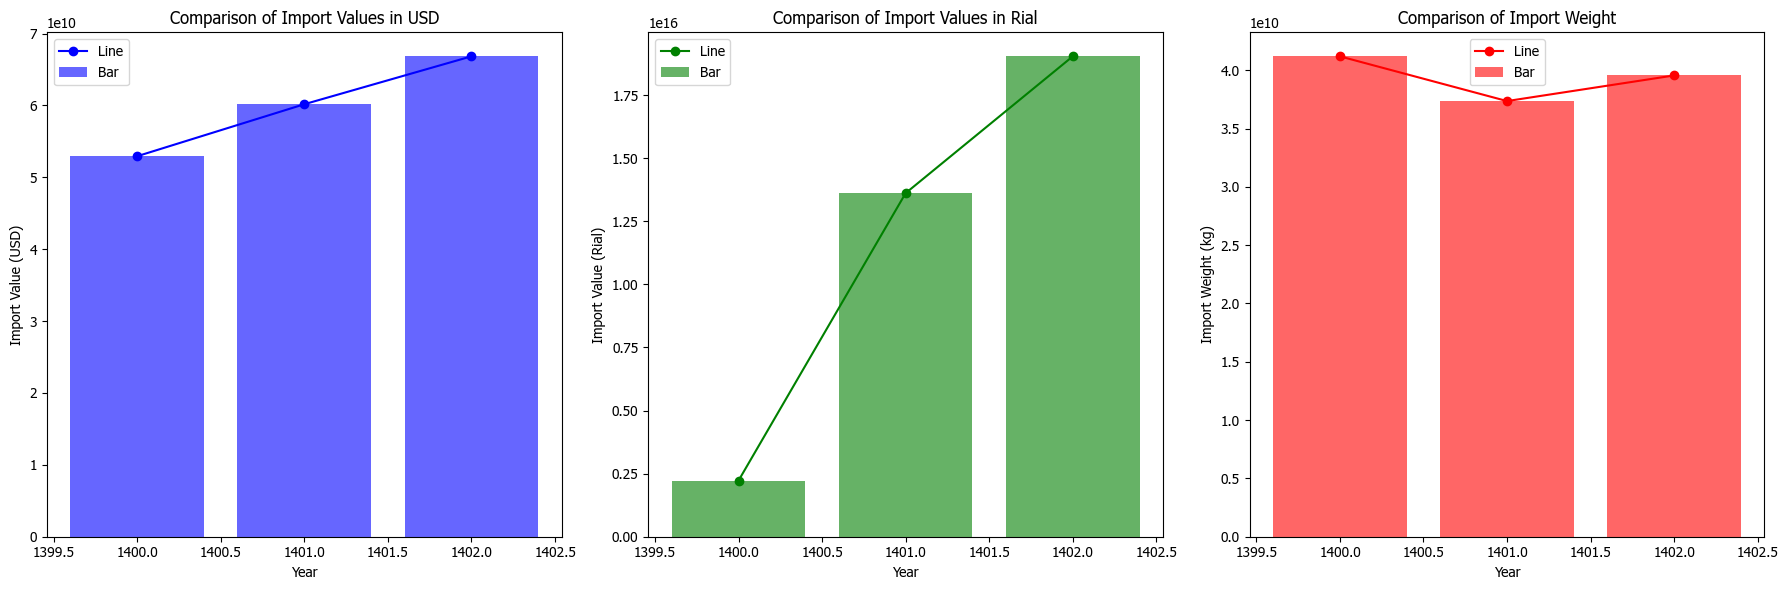

,Year,Total Import (USD),Total Import (Rial),Total Import (kg)
0,1400,5.293847e+10,"2,223,392,690,462,985",41192176322
1,1401,6.017160e+10,"13,612,701,648,587,748",37357182624
2,1402,6.683300e+10,"19,032,024,160,421,732",39555035361


In [15]:
summarize_and_plot(
    imported_data_frames,
    column_names=['fee(usd)', 'fee(Rial)', 'weight(kg)'],
    titles=['Comparison of Import Values in USD', 'Comparison of Import Values in Rial', 'Comparison of Import Weight'],
    ylabels=['Import Value (USD)', 'Import Value (Rial)', 'Import Weight (kg)'],
    colors=['blue', 'green', 'red'],
    data_type='Import'
)


# تابع صادرات

Summary of Export Values:


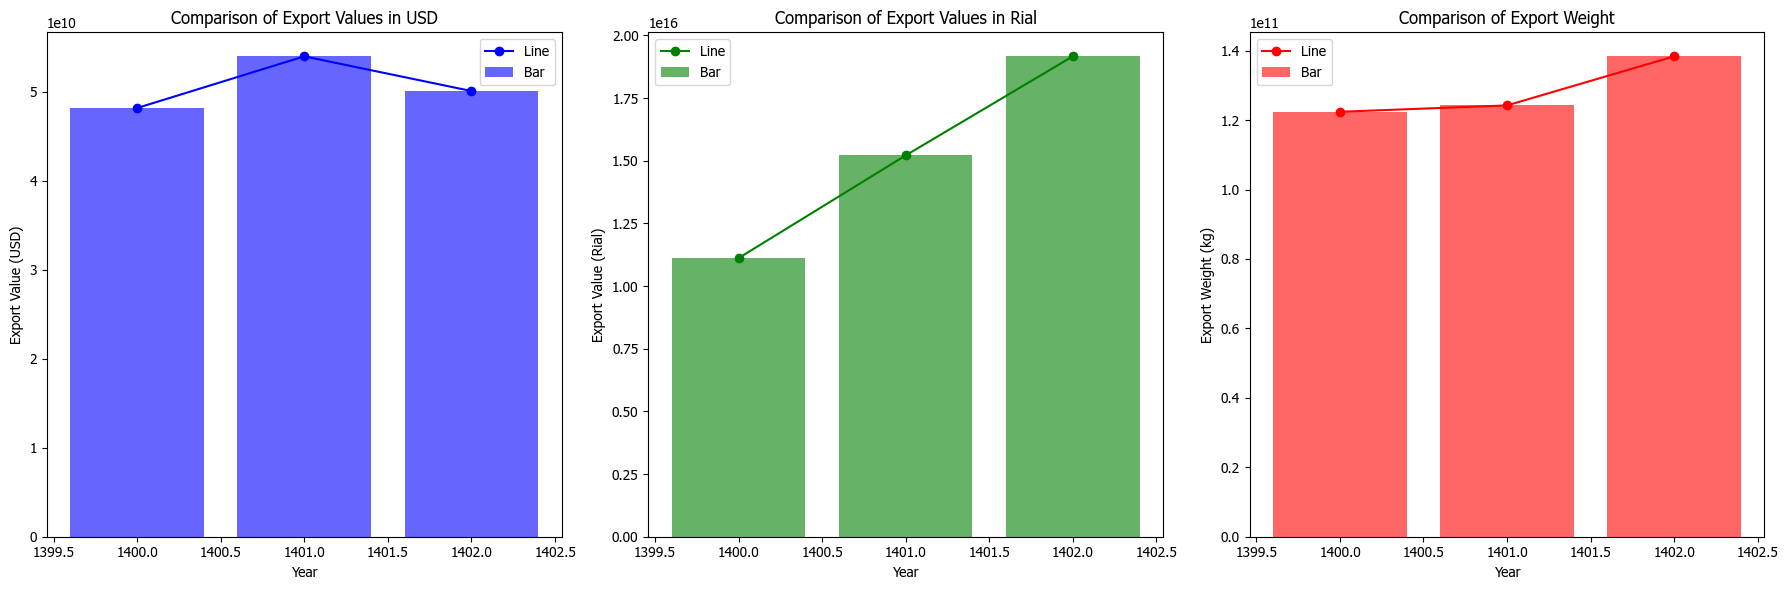

,Year,Total Export (USD),Total Export (Rial),Total Export (kg)
0,1400,48169252889,"11,114,344,798,807,310",122402988205
1,1401,53973618068,"15,212,175,689,957,300",124241281003
2,1402,50077609685,"19,164,237,697,578,720",138372870158


In [16]:
summarize_and_plot(
    exported_data_frames,
    column_names=['fee(usd)', 'fee(Rial)', 'weight(kg)'],
    titles=['Comparison of Export Values in USD', 'Comparison of Export Values in Rial', 'Comparison of Export Weight'],
    ylabels=['Export Value (USD)', 'Export Value (Rial)', 'Export Weight (kg)'],
    colors=['blue', 'green', 'red'],
    data_type='Export'
)

# پیش بینی واردات 1403

Summary of Import Values:


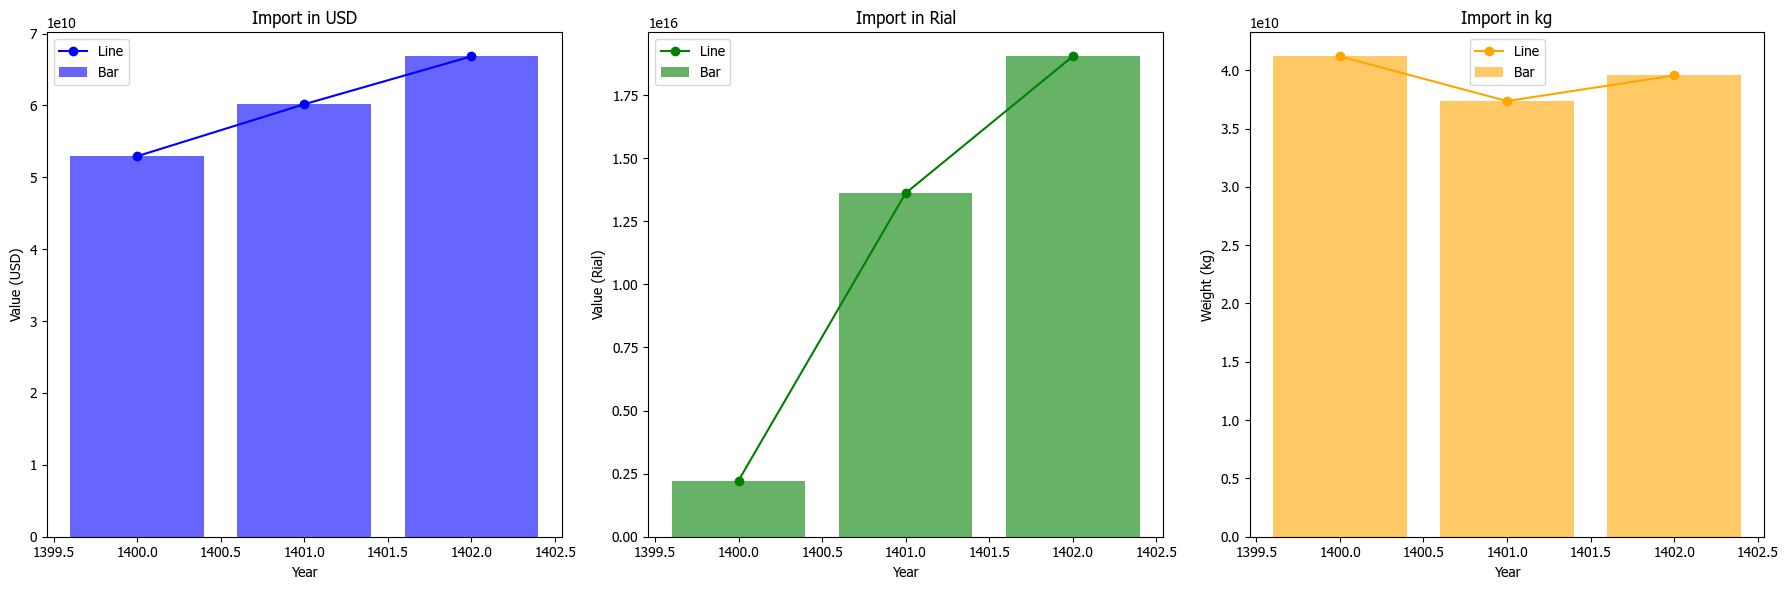

LinearRegression()

In [17]:
column_names = ['fee(usd)', 'fee(Rial)', 'weight(kg)']
titles = ['Import in USD', 'Import in Rial', 'Import in kg']
ylabels = ['Value (USD)', 'Value (Rial)', 'Weight (kg)']
colors = ['blue', 'green', 'orange']
data_type = "Import"

# اجرای تابع برای واردات
summary_df = summarize_and_plot(imported_data_frames, column_names, titles, ylabels, colors, data_type)

# داده‌ها برای پیش‌بینی
years = summary_df["Year"].values.reshape(-1, 1)  # سال‌ها
import_values_usd = summary_df["Total Import (USD)"].astype(float).values  # مقادیر واردات به دلار

# مدل رگرسیون خطی
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(years, import_values_usd)



In [18]:
predicted_import_1403 = model.predict([[1403]])

# نمایش متن بولد و بزرگ
display(HTML(f"<b><font size='4'>Predicted Import (USD) for 1403: {predicted_import_1403[0]:,.0f}</font></b>"))


میزان واردات در سال 1402 67 میلیون دلار ، در سال 1401 60 میلیون دلار ودر سال 1400 حدود 53 میلیون دلار 
واردات در سال 1402 نسبت به سال 1401 حدود ده درصد افزایش داشته و در سال 1401 نسبت به 1400 هم حدود ده درصد افزایش داشته
با این روند افزایشی میشه پیش بینی کرد که واردات در سال 1403 نسبت به سال 1402 ده درصد افزایش نشون بده و به مقدار حدودی 74 میلیون دلار برسه
با استفاده از مدل رگرسیون خطی هم به همین نتیجه رسیدیم


# تابع ترکیب دیتا واردات و صادرات

In [19]:
def plot_combined_import_export(import_data, export_data, column_name, title, ylabel):
    # محاسبه مجموع واردات و صادرات بر اساس سال
    years = ['1400', '1401', '1402']
    total_import = [df[column_name].sum() for df in import_data]
    total_export = [df[column_name].sum() for df in export_data]

    # تنظیم داده‌ها برای رسم
    x = np.arange(len(years)) 
    width = 0.35  

    fig, ax = plt.subplots(figsize=(10, 6))

    # رسم ستون‌های واردات
    ax.bar(x - width/2, total_import, width, label='Import', color='blue')

    # رسم ستون‌های صادرات
    ax.bar(x + width/2, total_export, width, label='Export', color='green')

    # تنظیم برچسب‌ها و عنوان
    ax.set_xlabel('Year')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(years)
    ax.legend()

    # نمایش نمودار
    plt.tight_layout()
    plt.show()


# نمودار ترکیب واردات و صادرات

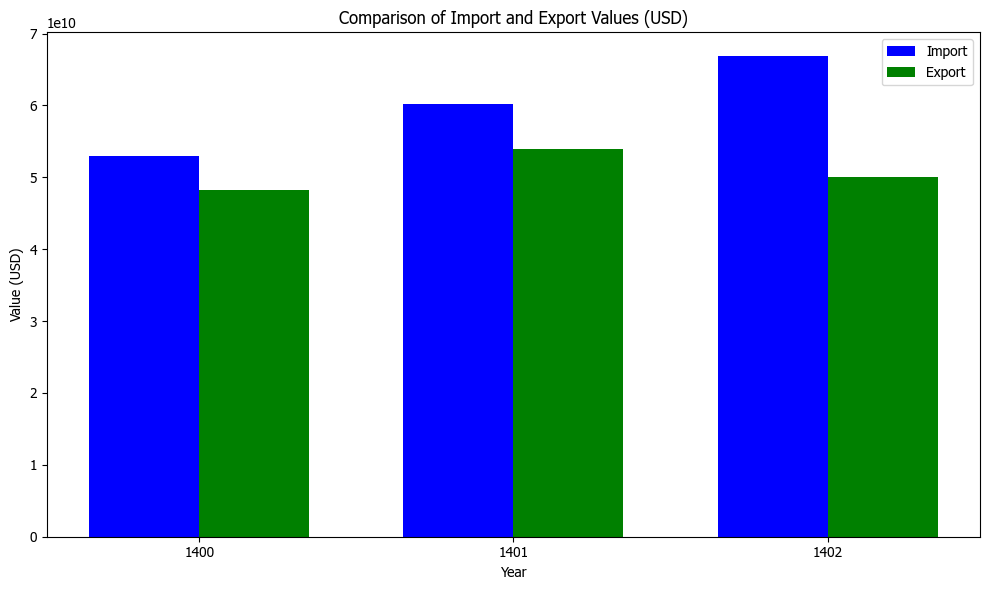

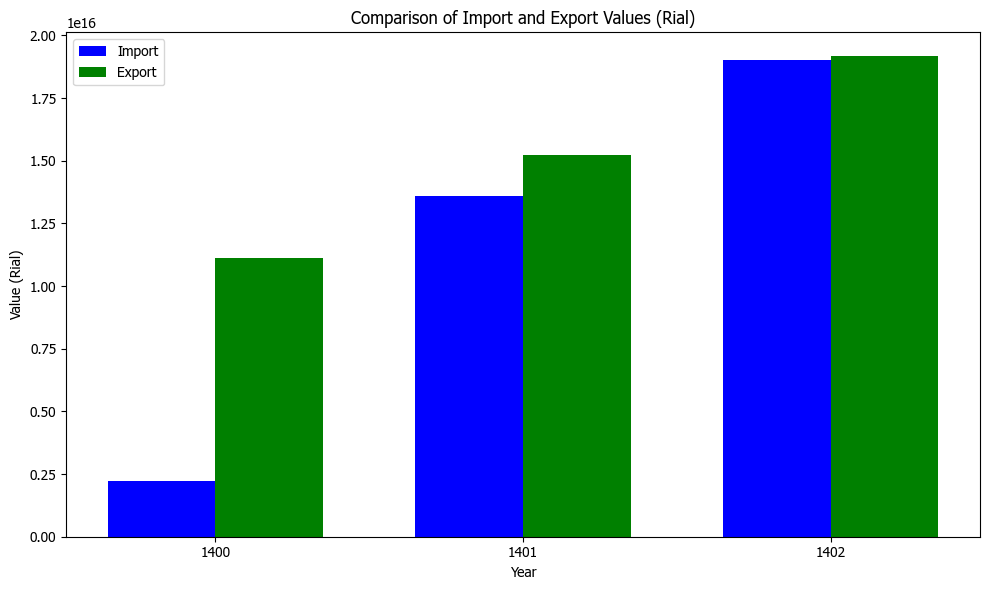

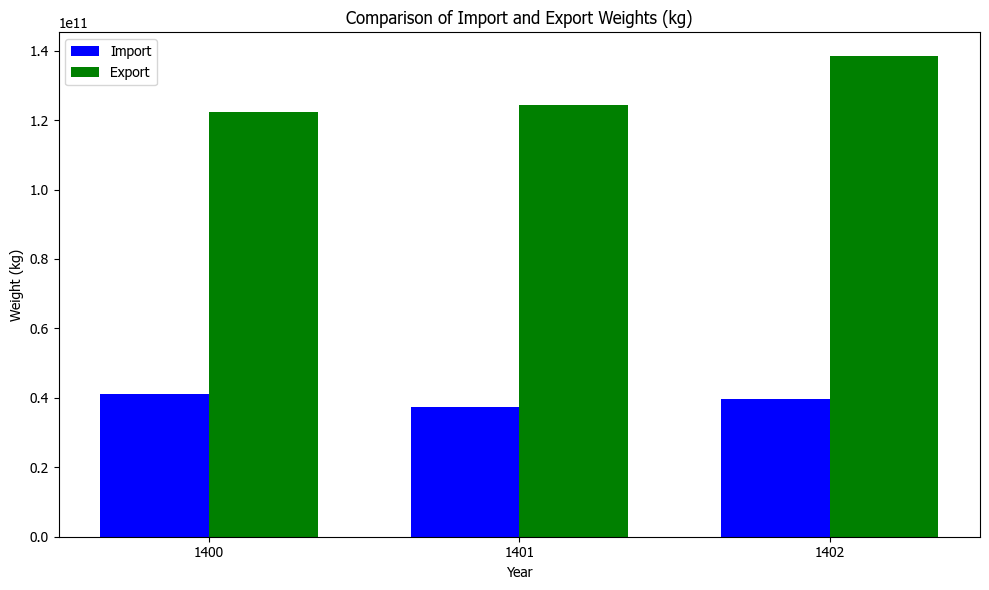

In [20]:
# نمودار مقایسه واردات و صادرات بر اساس ارزش به دلار
plot_combined_import_export(
    import_data=imported_data_frames,
    export_data=exported_data_frames,
    column_name='fee(usd)',
    title='Comparison of Import and Export Values (USD)',
    ylabel='Value (USD)'
)

# نمودار مقایسه واردات و صادرات بر اساس ارزش به ریال
plot_combined_import_export(
    import_data=imported_data_frames,
    export_data=exported_data_frames,
    column_name='fee(Rial)',
    title='Comparison of Import and Export Values (Rial)',
    ylabel='Value (Rial)'
)

# نمودار مقایسه واردات و صادرات بر اساس وزن
plot_combined_import_export(
    import_data=imported_data_frames,
    export_data=exported_data_frames,
    column_name='weight(kg)',
    title='Comparison of Import and Export Weights (kg)',
    ylabel='Weight (kg)'
)


# واردات و صادرات بر اساس کشور

In [21]:
def summarize_trade_by_country(data_frames, column_name, country_column, trade_type, title, ylabel):
    """
    این تابع مقادیر واردات یا صادرات را بر اساس کشور خلاصه کرده و نمودار میله‌ای ایجاد می‌کند.

    :param data_frames: لیستی از دیتافریم‌ها (واردات یا صادرات)
    :param column_name: ستون مربوط به مقدار معامله (مثلاً 'fee(usd)')
    :param country_column: ستون مربوط به کشورها (مثلاً 'country')
    :param trade_type: نوع معامله ('Import' یا 'Export')
    :param title: عنوان نمودار
    :param ylabel: برچسب محور y
    """
    # تنظیم فونت فارسی
    configure_farsi_font()

    # ایجاد دیتافریم جدید برای ذخیره مجموع واردات یا صادرات بر اساس کشور
    country_trades = []

    for df in data_frames:
        # گروه‌بندی بر اساس کشور و محاسبه مجموع واردات یا صادرات
        country_sum = df.groupby(country_column)[column_name].sum().reset_index()
        country_trades.append(country_sum)

    # ادغام همه داده‌های مجموع واردات/صادرات کشورها در یک دیتافریم
    combined_df = pd.concat(country_trades, ignore_index=True)
    
    # گروه‌بندی دوباره برای بدست آوردن مجموع واردات/صادرات برای همه سال‌ها
    final_df = combined_df.groupby(country_column)[column_name].sum().reset_index()

   
    final_df[country_column] = final_df[country_column].apply(reshape_text)

    

    # رسم نمودار
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(final_df[country_column], final_df[column_name], color='blue')
    ax.set_xlabel(reshape_text('کشور'), fontsize=14)
    ax.set_ylabel(reshape_text(ylabel), fontsize=14)
    ax.set_title(reshape_text(title), fontsize=16)

    plt.xticks(rotation=90, fontsize=12)
    plt.tight_layout()
    plt.show()


#  واردات بر اساس کشورها

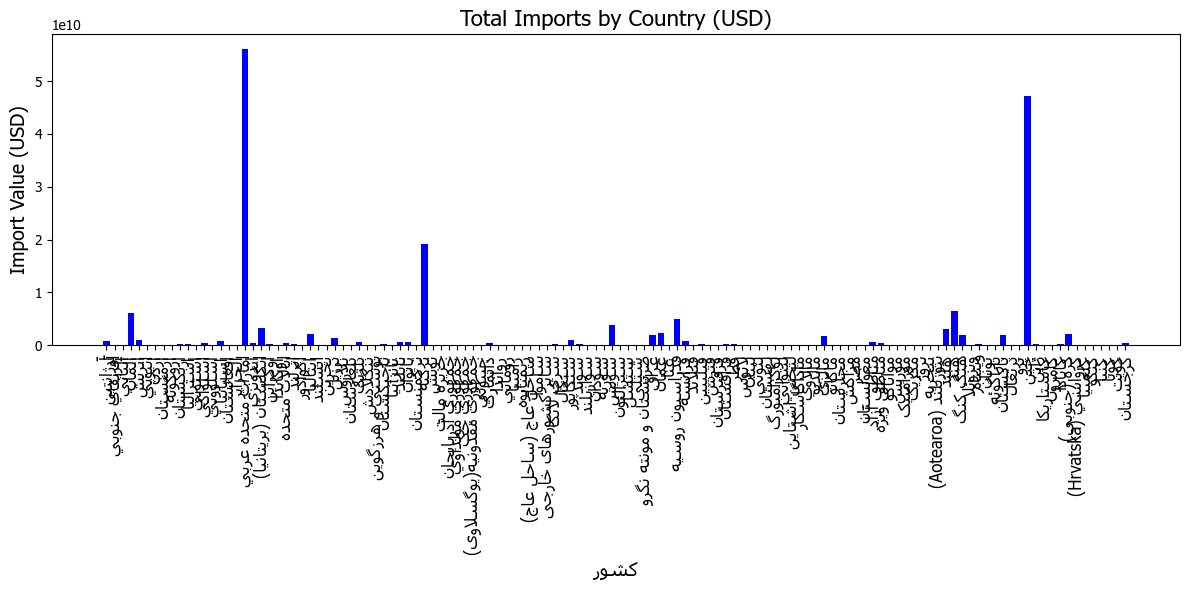

In [22]:
summarize_trade_by_country(
    imported_data_frames,  # دیتافریم‌های واردات
    column_name='fee(usd)',  # ستون واردات به دلار
    country_column='country',  # ستون کشور
    trade_type='Import',  # نوع معامله واردات
    title='Total Imports by Country (USD)',  # عنوان نمودار
    ylabel='Import Value (USD)'  # برچسب محور عمودی
)

# صادرات بر اساس کشورها

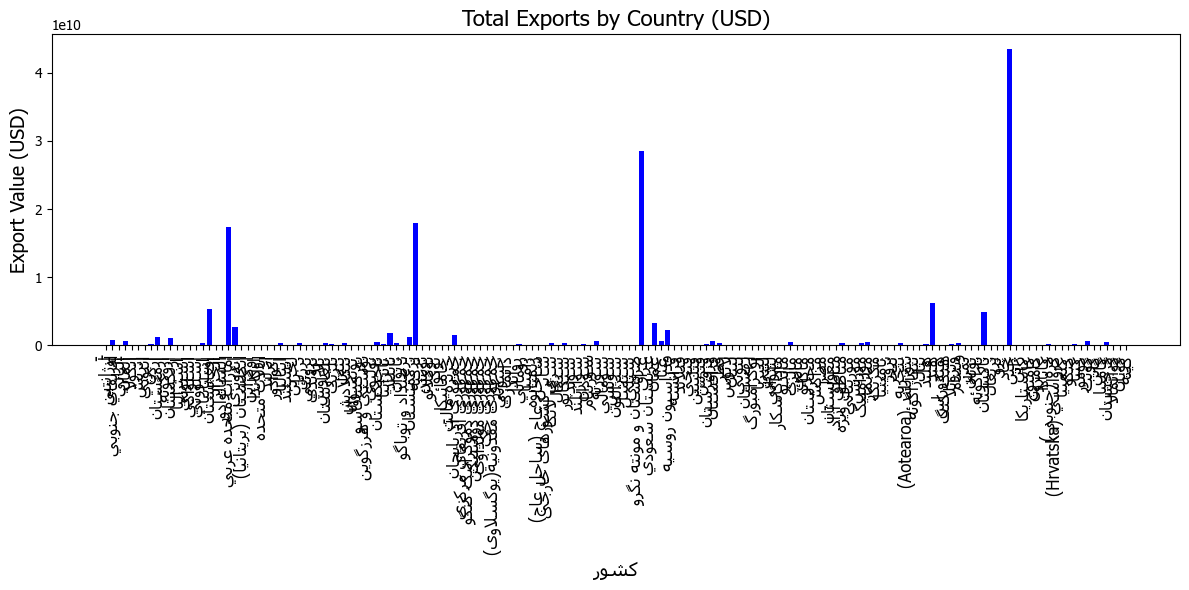

In [23]:
summarize_trade_by_country(
    exported_data_frames, 
    column_name='fee(usd)',  
    country_column='country',  
    trade_type='Export', 
    title='Total Exports by Country (USD)',  
    ylabel='Export Value (USD)'  
)


# حدف داده های پرت با PCA

In [24]:
def remove_outliers_with_pca(data_frames, column_name, country_column, trade_type):
    # ترکیب همه داده‌ها برای PCA
    combined_df = pd.concat(data_frames, ignore_index=True)
    
    # انتخاب فقط ستون‌های واردات/صادرات و کشور
    trade_data = combined_df[[country_column, column_name]].groupby(country_column).sum().reset_index()

    # استانداردسازی داده‌ها
    scaler = StandardScaler()
    trade_data_scaled = scaler.fit_transform(trade_data[[column_name]])

    # اجرای PCA
    pca = PCA(n_components=1)
    pca_result = pca.fit_transform(trade_data_scaled)

    # محاسبه IQR برای شناسایی داده‌های پرت
    Q1 = np.percentile(pca_result, 25)
    Q3 = np.percentile(pca_result, 75)
    IQR = Q3 - Q1
    threshold = Q3 + 1.5 * IQR

     # انتخاب کشورهایی که بالاتر از آستانه هستند
    trade_data['PCA_Score'] = pca_result
    trade_data_filtered = trade_data[trade_data['PCA_Score'] > threshold]

    # نمایش کشورهایی که بالاتر از آستانه هستند
    pd.options.display.float_format = '{:,.0f}'.format  # تنظیم قالب‌بندی اعداد
    #print(f"Countries with highest {trade_type}:")
    #print(trade_data_filtered)

    return trade_data_filtered

# تابع برای انتخاب ۱۰ کشور با بیشترین واردات یا صادرات

In [25]:
def get_top_countries_by_trade(trade_data, column_name, top_n=10):
    trade_data_sorted = trade_data.sort_values(by=column_name, ascending=False)
    return trade_data_sorted.head(top_n)

# رسم نمودار واردات یا صادرات برای کشورهایی که در آستانه هستند

In [26]:

def plot_trade_by_country(filtered_data, column_name, country_column, trade_type, title, ylabel):
    # رسم نمودار
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(filtered_data[country_column], filtered_data[column_name], color='blue')
    ax.set_xlabel('Country', fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(title, fontsize=16)
    
    # نمایش اسم کشورهای محور X به صورت افقی
    ax.set_xticks(range(len(filtered_data[country_column])))
    ax.set_xticklabels(filtered_data[country_column], rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


#     این تابع داده‌های واردات یا صادرات را تحلیل کرده و نتایج را نمایش می‌دهد.

In [27]:
def analyze_trade_data(data_frames, column_name, country_column, trade_type, top_n=10):
    """
    این تابع داده‌های واردات یا صادرات را تحلیل کرده و نتایج را نمایش می‌دهد.
    
    :param data_frames: لیستی از دیتافریم‌ها (واردات یا صادرات)
    :param column_name: ستون مربوط به مقدار معامله (مثلاً 'fee(usd)')
    :param country_column: ستون مربوط به کشورها (مثلاً 'country')
    :param trade_type: نوع معامله ('Import' یا 'Export')
    :param top_n: تعداد کشورهای برتر برای نمایش (پیش‌فرض ۱۰)
    """
    # تنظیم فونت فارسی
    configure_farsi_font()

    # حذف داده‌های پرت
    filtered_data = remove_outliers_with_pca(
        data_frames, 
        column_name=column_name, 
        country_column=country_column, 
        trade_type=trade_type
    )

    # دریافت لیست کشورهای برتر بر اساس واردات یا صادرات
    top_countries = get_top_countries_by_trade(
        filtered_data,
        column_name=column_name,
        top_n=top_n
    )


    # بازآرایی متن فارسی کشورها
    top_countries[country_column] = top_countries[country_column].apply(reshape_text)

    # رسم نمودار
    plot_trade_by_country(
        filtered_data=top_countries,
        column_name=column_name,
        country_column=country_column,
        trade_type=trade_type,
        title=reshape_text(f'Top {top_n} {trade_type} Countries by Value (USD)'),
        ylabel=reshape_text(f'{trade_type} Value (USD)')
    )

  

# اجرای کد برای واردات

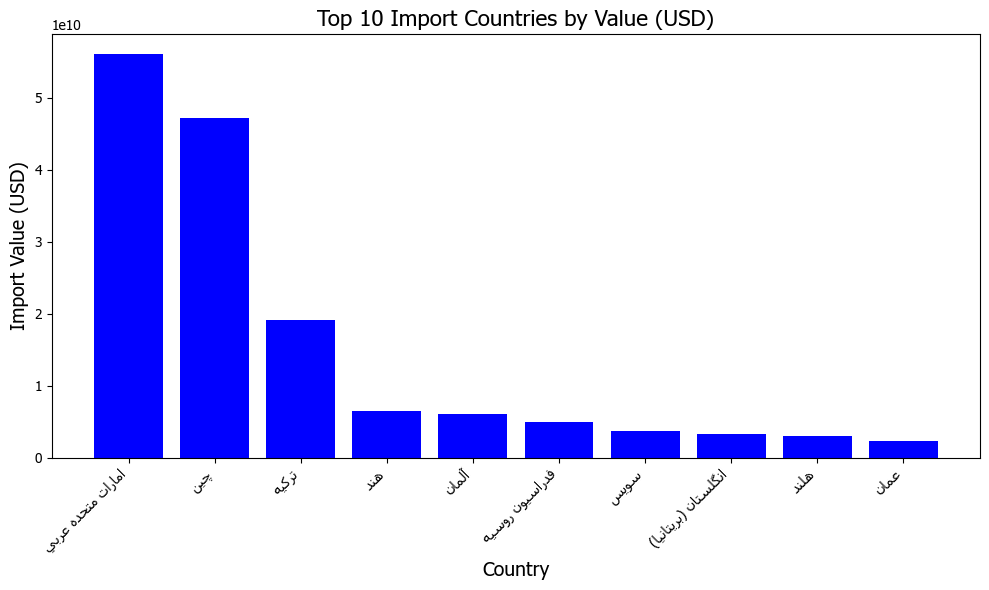

In [28]:
# اجرای تحلیل برای واردات
analyze_trade_data(
    data_frames=imported_data_frames, 
    column_name='fee(usd)', 
    country_column='country', 
    trade_type='Import'
)

# اجرای کد برای صادرات

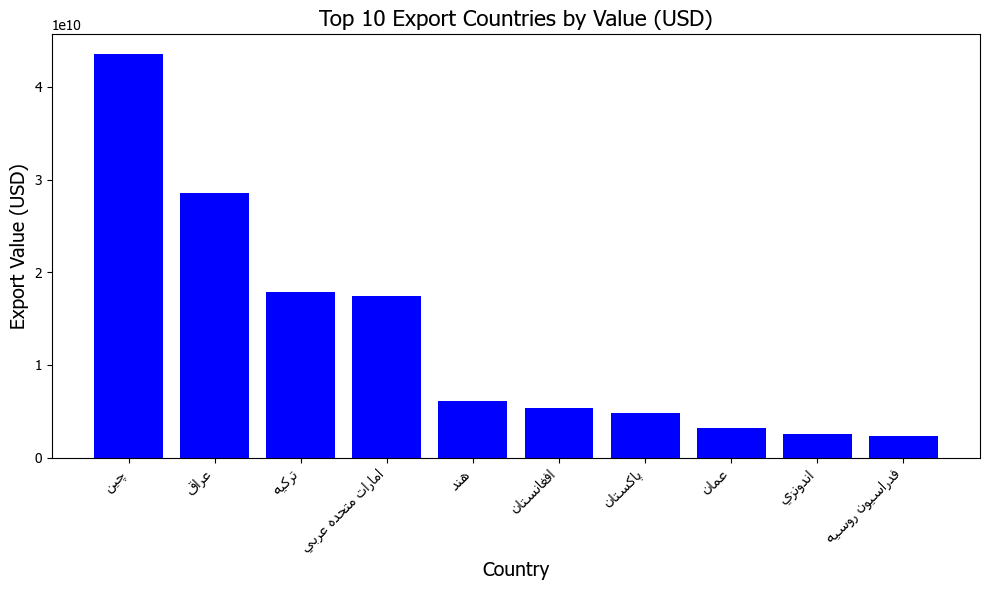

In [29]:

# اجرای تحلیل برای صادرات
analyze_trade_data(
    data_frames=exported_data_frames, 
    column_name='fee(usd)', 
    country_column='country', 
    trade_type='Export'
)

واردات از 5 کشور برتر:

چین
امارات متحده عربی
ترکیه
هند
آلمان


صادرات به 5 کشور برتر:

چین
عراق
ترکیه
امارات متحده عربی
هند
تحلیل اولیه:

یافته‌های کلیدی:

تسلط آسیا: کشورهای آسیایی به ویژه چین، هند و ترکیه سهم قابل توجهی از تجارت ایران را به خود اختصاص داده‌اند. این امر نشان دهنده اهمیت روابط اقتصادی ایران با کشورهای منطقه است.

نقش امارات متحده عربی: امارات به عنوان یک مرکز تجاری مهم در منطقه، نقش کلیدی در تجارت خارجی ایران ایفا می‌کند. این کشور هم به عنوان مقصد صادرات و هم به عنوان مبدا واردات برای ایران اهمیت دارد.
اهمیت ترکیه: ترکیه نیز به عنوان یک شریک تجاری مهم برای ایران، نقش قابل توجهی در تجارت کالاهای صنعتی و مصرفی دارد.
ثبات در شرکای تجاری: وجود کشورهای مشترک در لیست پنج کشور برتر واردات و صادرات نشان دهنده ثبات نسبی در روابط تجاری ایران با این کشورها است.



# ماتریس همبستگی

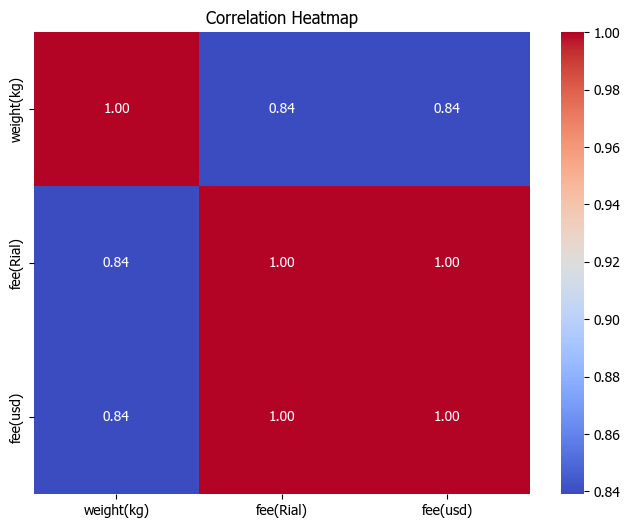

In [30]:
# انتخاب فقط ستون‌های عددی
numeric_columns = df[['weight(kg)', 'fee(Rial)', 'fee(usd)']]

# محاسبه ماتریس همبستگی
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


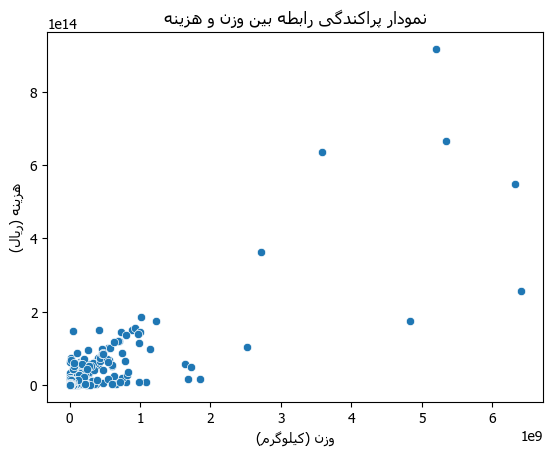

In [31]:
# نمودار پراکندگی
sns.scatterplot(x='weight(kg)', y='fee(Rial)', data=df)
plt.xlabel(reshape_text('وزن (کیلوگرم)'))
plt.ylabel(reshape_text('هزینه (ریال)'))
plt.title(reshape_text('نمودار پراکندگی رابطه بین وزن و هزینه'))
plt.show()

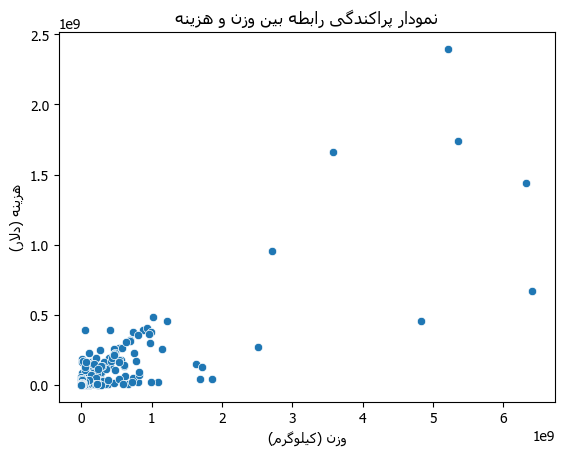

In [32]:
# نمودار پراکندگی
sns.scatterplot(x='weight(kg)', y='fee(usd)', data=df)
plt.xlabel(reshape_text('وزن (کیلوگرم)'))
plt.ylabel(reshape_text('هزینه (دلار)'))
plt.title(reshape_text('نمودار پراکندگی رابطه بین وزن و هزینه'))
plt.show()

این ماتریس نشون میده که ارتباط مستقیمی بین وزن کالا ونرخ
واردات دلاری و ریالی وجود دارد . به عبارتی هر چه وزن کالا بیشتر باشد ارزش ریالی ودلاری آن بیشتر خواهد بود


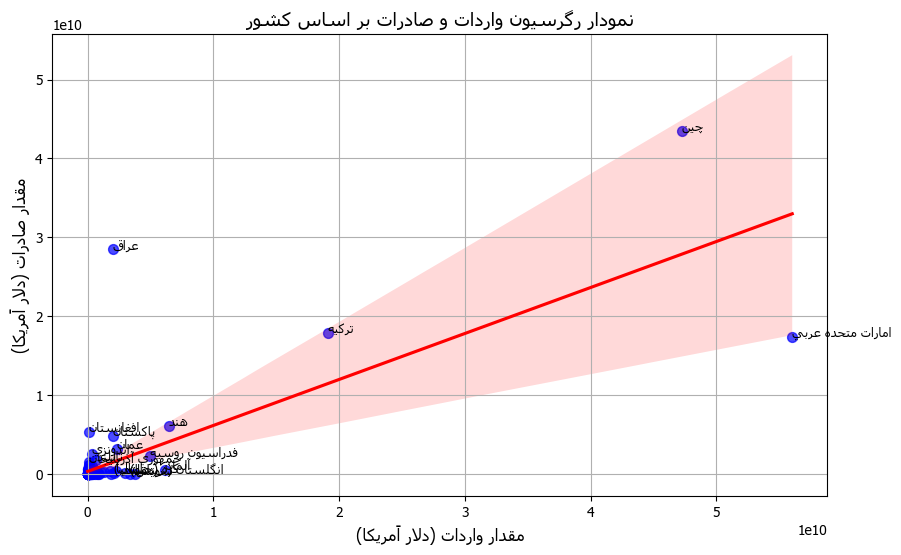

In [33]:

def plot_regression_import_export(import_data, export_data):
    # تنظیم فونت فارسی
    configure_farsi_font()

    # ترکیب داده‌های واردات و صادرات
    import_df = pd.concat(import_data)
    export_df = pd.concat(export_data)

    # گروه‌بندی بر اساس کشور و محاسبه مجموع واردات و صادرات
    import_summary = import_df.groupby('country')['fee(usd)'].sum()
    export_summary = export_df.groupby('country')['fee(usd)'].sum()

    # ایجاد DataFrame نهایی برای رسم
    combined_data = pd.DataFrame({
        'Import Value (USD)': import_summary,
        'Export Value (USD)': export_summary
    }).reset_index()

    # حذف مقادیر نال
    combined_data.dropna(inplace=True)

    # رسم نمودار پراکندگی با خط رگرسیون
    plt.figure(figsize=(10, 6))
    sns.regplot(
        data=combined_data,
        x='Import Value (USD)',
        y='Export Value (USD)',
        scatter_kws={'alpha': 0.7, 's': 50, 'color': 'blue'},
        line_kws={'color': 'red'}
    )
    # عنوان و برچسب‌ها به فارسی
    plt.title(reshape_text('نمودار رگرسیون واردات و صادرات بر اساس کشور'), fontsize=14)
    plt.xlabel(reshape_text('مقدار واردات (دلار آمریکا)'), fontsize=12)
    plt.ylabel(reshape_text('مقدار صادرات (دلار آمریکا)'), fontsize=12)
    plt.grid(True)

    # برچسب زدن به برخی از نقاط (مثلاً بزرگترین کشورها)
    for i, row in combined_data.iterrows():
        if row['Import Value (USD)'] > combined_data['Import Value (USD)'].quantile(0.9) or row['Export Value (USD)'] > combined_data['Export Value (USD)'].quantile(0.9):
            plt.text(row['Import Value (USD)'], row['Export Value (USD)'], reshape_text(row['country']), fontsize=9)

    plt.show()

# فراخوانی تابع
plot_regression_import_export(imported_data_frames, exported_data_frames)


# نمودار رگرسیون واردات و صادرات

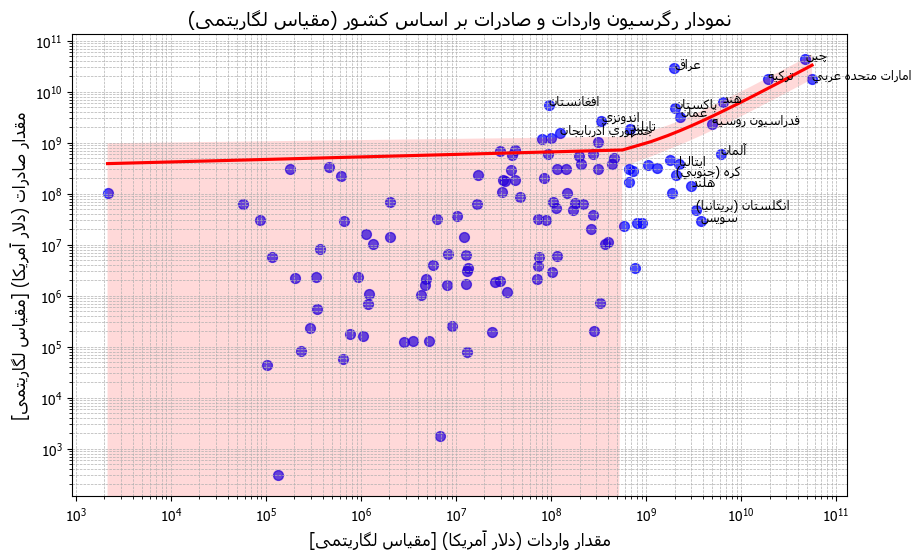

In [34]:

def plot_regression_import_export_with_log(import_data, export_data):
    # تنظیم فونت فارسی
    configure_farsi_font()

    # ترکیب داده‌های واردات و صادرات
    import_df = pd.concat(import_data)
    export_df = pd.concat(export_data)

    # گروه‌بندی بر اساس کشور و محاسبه مجموع واردات و صادرات
    import_summary = import_df.groupby('country')['fee(usd)'].sum()
    export_summary = export_df.groupby('country')['fee(usd)'].sum()

    # ایجاد DataFrame نهایی برای رسم
    combined_data = pd.DataFrame({
        'Import Value (USD)': import_summary,
        'Export Value (USD)': export_summary
    }).reset_index()

    # حذف مقادیر نال
    combined_data.dropna(inplace=True)

    # رسم نمودار پراکندگی با مقیاس لگاریتمی
    plt.figure(figsize=(10, 6))
    sns.regplot(
        data=combined_data,
        x='Import Value (USD)',
        y='Export Value (USD)',
        scatter_kws={'alpha': 0.7, 's': 50, 'color': 'blue'},
        line_kws={'color': 'red'}
    )
    plt.xscale('log')
    plt.yscale('log')
    
    # عنوان و برچسب‌ها به فارسی
    plt.title(reshape_text('نمودار رگرسیون واردات و صادرات بر اساس کشور (مقیاس لگاریتمی)'), fontsize=14)
    plt.xlabel(reshape_text('مقدار واردات (دلار آمریکا) [مقیاس لگاریتمی]'), fontsize=12)
    plt.ylabel(reshape_text('مقدار صادرات (دلار آمریکا) [مقیاس لگاریتمی]'), fontsize=12)
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)

    # برچسب زدن به برخی از نقاط (مثلاً بزرگترین کشورها)
    for i, row in combined_data.iterrows():
        if row['Import Value (USD)'] > combined_data['Import Value (USD)'].quantile(0.9) or row['Export Value (USD)'] > combined_data['Export Value (USD)'].quantile(0.9):
            plt.text(row['Import Value (USD)'], row['Export Value (USD)'], reshape_text(row['country']), fontsize=9)

    plt.show()

# فراخوانی تابع
plot_regression_import_export_with_log(imported_data_frames, exported_data_frames)


#    رسم نمودارهای باکس‌پلات برای مقایسه واردات و صادرات بر اساس قاره ها.


In [35]:
country_to_continent = {
    'ایران': 'Asia',
    'ترکیه': 'Asia',
    'آلمان': 'Europe',
    'چین': 'Asia',
    'هند': 'Asia',
    'آمریکا': 'North America',
    'برزیل': 'South America',
    'روسیه': 'Europe/Asia',  # روسیه در دو قاره قرار دارد
    'ژاپن': 'Asia',
    'استرالیا': 'Oceania',
    'کانادا': 'North America',
    'فرانسه': 'Europe',
    'انگلستان': 'Europe',
    'آفریقای جنوبی': 'Africa',
    'مکزیک': 'North America',
    'مصر': 'Africa',
    'آرژانتین': 'South America',
    'نیجریه': 'Africa',
    'ایتالیا': 'Europe',
    'اسپانیا': 'Europe',
    'عربستان سعودی': 'Asia',
    'کره جنوبی': 'Asia',
    'اندونزی': 'Asia',
    'پاکستان': 'Asia',
    'بنگلادش': 'Asia',
    'مالزی': 'Asia',
    'سنگاپور': 'Asia',
    'شیلی': 'South America',
    'کلمبیا': 'South America',
    'پرو': 'South America',
    'لهستان': 'Europe',
    'اوکراین': 'Europe',
    'رومانی': 'Europe',
    'قزاقستان': 'Asia',
    'عراق': 'Asia',
    'افغانستان': 'Asia',
    'الجزایر': 'Africa',
    'سودان': 'Africa',
    'کنیا': 'Africa',
    'مراکش': 'Africa',
    'آنگولا': 'Africa',
    'یونان': 'Europe',
    'هلند': 'Europe',
    'بلژیک': 'Europe',
    'سوئد': 'Europe',
    'نروژ': 'Europe',
    'فنلاند': 'Europe',
    'دانمارک': 'Europe',
    'سوئیس': 'Europe',
    'پرتغال': 'Europe',
    'جمهوری چک': 'Europe',
    'اسلواکی': 'Europe',
    'مجارستان': 'Europe',
    'بلغارستان': 'Europe',
    'صربستان': 'Europe',
    'کرواتیا': 'Europe',
    'اسلوونی': 'Europe',
    'استونی': 'Europe',
    'لتونی': 'Europe',
    'لیتوانی': 'Europe',
    'بلاروس': 'Europe',
    'مولداوی': 'Europe',
    'کوزوو': 'Europe',
    'مونته‌نگرو': 'Europe',
    'مقدونیه شمالی': 'Europe',
    'بوسنی و هرزگوین': 'Europe',
    'آلبانی': 'Europe',
    'گرجستان': 'Europe/Asia',  # گرجستان در مرز اروپا و آسیا قرار دارد
    'ارمنستان': 'Europe/Asia',  # ارمنستان در مرز اروپا و آسیا قرار دارد
    'ترکیه': 'Europe/Asia',  # ترکیه در مرز اروپا و آسیا قرار دارد
}


In [36]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import arabic_reshaper
from bidi.algorithm import get_display
import seaborn as sns
import pandas as pd

# تنظیم فونت فارسی
def configure_farsi_font():
    rcParams['font.family'] = 'Tahoma'  # تغییر به فونت فارسی پشتیبانی شده
    rcParams['axes.unicode_minus'] = False

# تابع برای اصلاح نمایش متون فارسی
def reshape_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

# فعال کردن فونت فارسی
configure_farsi_font()


def plot_boxplots(imported_data_frames, exported_data_frames, x_column, y_column, figsize=(16, 6), plot_type='box'):
    
    # تبدیل لیست‌ها به DataFrame در صورت نیاز
    if isinstance(imported_data_frames, list):
        imported_data_frames = pd.concat(imported_data_frames, ignore_index=True)

    if isinstance(exported_data_frames, list):
        exported_data_frames = pd.concat(exported_data_frames, ignore_index=True)

    # اضافه کردن ستون 'continent' بر اساس دیکشنری
    imported_data_frames['continent'] = imported_data_frames['country'].map(country_to_continent)
    exported_data_frames['continent'] = exported_data_frames['country'].map(country_to_continent)

    # ستون‌های مورد نیاز
    required_columns = [x_column, y_column, 'continent']

    # بررسی وجود ستون‌ها در داده‌های واردات
    if not all(col in imported_data_frames.columns for col in required_columns):
        raise ValueError(f"ستون‌های مورد نیاز {required_columns} در داده‌های واردات وجود ندارند.")

    # بررسی وجود ستون‌ها در داده‌های صادرات
    if not all(col in exported_data_frames.columns for col in required_columns):
        raise ValueError(f"ستون‌های مورد نیاز {required_columns} در داده‌های صادرات وجود ندارند.")

    # رسم نمودارها
    fig, axes = plt.subplots(1, 2, figsize=figsize, sharey=True)
    datasets = [(imported_data_frames, 'واردات', 'blue'), (exported_data_frames, 'صادرات', 'green')]

    for i, (df, label, color) in enumerate(datasets):
        if plot_type == 'box':
            sns.boxplot(data=df, x='continent', y=y_column, ax=axes[i], color=color)
        else:
            raise ValueError(f"نوع نمودار '{plot_type}' پشتیبانی نمی‌شود.")

        axes[i].set_title(reshape_text(f'توزیع هزینه {label} (USD) بر اساس قاره‌ها'))
        axes[i].set_xlabel(reshape_text('قاره'))
        axes[i].set_ylabel(reshape_text('هزینه (دلار)'))

    plt.tight_layout()
    plt.show()


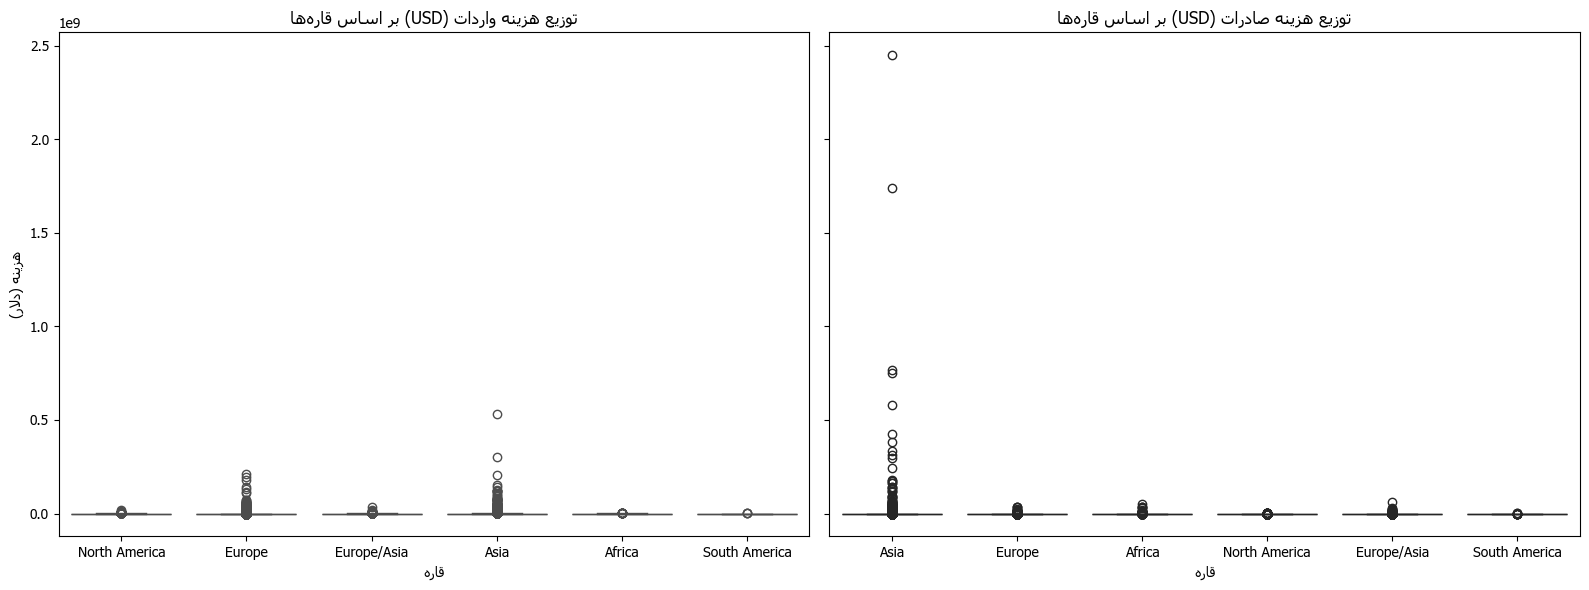

In [37]:
plot_boxplots(
    imported_data_frames=imported_data_frames,
    exported_data_frames=exported_data_frames,
    x_column='continent',
    y_column='fee(usd)',
    figsize=(16, 6)
)


به نظر می‌رسد که قاره‌ها به ترتیب اهمیت در زمینه واردات و صادرات به شرح زیر باشند:

واردات:

آسیا بیشترین حجم واردات را به خود اختصاص داده است. این موضوع ممکن است به دلیل روابط تجاری گسترده ایران با کشورهای آسیایی، از جمله چین، هند، و ترکیه باشد.
اروپا در رتبه دوم قرار دارد، که احتمالاً به دلیل توافقات تجاری و روابط دیپلماتیک ایران با کشورهای اروپایی است.
صادرات:

آسیا به عنوان بهترین بازار هدف برای ایران شناخته شده است. این موضوع ممکن است به دلیل تقاضای بالای محصولات ایرانی در کشورهای آسیایی باشد، خصوصاً در زمینه‌های نفت، گاز، مواد غذایی، و دیگر صنایع.
اروپا و آفریقا در رتبه‌های بعدی قرار دارند. این نشان می‌دهد که ایران نیز به دنبال گسترش روابط تجاری با این قاره‌ها است، اما اختلاف زیادی با آسیا وجود دارد.

نکته قابل تامل دیگر اینکه  صادرات ایران در مقادیر بالا بسیار کم بوده و بیشتر میزان صادرات در مقادیر کم می باشد

   # رسم نمودار ارزش واردات یا صادرات بر اساس گمرک.


In [38]:

# تابع اصلی برای رسم نمودار
def plot_trade_by_customs(data_frames, column_name, customs_column, trade_type):
    """
    رسم نمودار ارزش واردات یا صادرات بر اساس گمرک.

    :param data_frames: لیستی از DataFrameهای مربوط به واردات یا صادرات.
    :param column_name: نام ستون مربوط به مقدار معامله (مثلاً 'fee(usd)').
    :param customs_column: نام ستون مربوط به گمرک (مثلاً 'custom_name').
    :param trade_type: نوع معامله ('Import' یا 'Export').
    """
    # تنظیم فونت فارسی
    configure_farsi_font()

    # ترکیب تمام داده‌های مربوط به واردات یا صادرات
    trade_df = pd.concat(data_frames)

    # گروه‌بندی بر اساس گمرک و محاسبه مجموع ارزش معاملات
    customs_summary = trade_df.groupby(customs_column)[column_name].sum().sort_values(ascending=False)

    # تبدیل به DataFrame برای رسم
    customs_summary_df = customs_summary.reset_index()
    customs_summary_df.columns = ['Custom Name', 'Total Trade Value (USD)']

    # اصلاح متون فارسی در ستون‌های DataFrame
    customs_summary_df['Custom Name'] = customs_summary_df['Custom Name'].apply(reshape_text)

    # رسم نمودار Bar Plot با تغییر جایگاه محورهای X و Y
    plt.figure(figsize=(12, 8))
    sns.barplot(
    data=customs_summary_df,
    x='Custom Name',
    y='Total Trade Value (USD)',
    dodge=False  # حذف نوارهای جداگانه برای هر گروه
)

    # عنوان و برچسب‌ها به فارسی
    plt.title(reshape_text(f'مجموع ارزش {trade_type} بر اساس گمرک'), fontsize=14)
    plt.xlabel(reshape_text('نام گمرک'), fontsize=12)
    plt.ylabel(reshape_text('مجموع ارزش معاملات (دلار آمریکا)'), fontsize=12)

    # کاهش اندازه فونت برای مقیاس‌های محور X و Y
    plt.xticks(fontsize=10, rotation=45)  
    plt.yticks(fontsize=10)

    plt.tight_layout()
    plt.show()
    


# برای واردات 

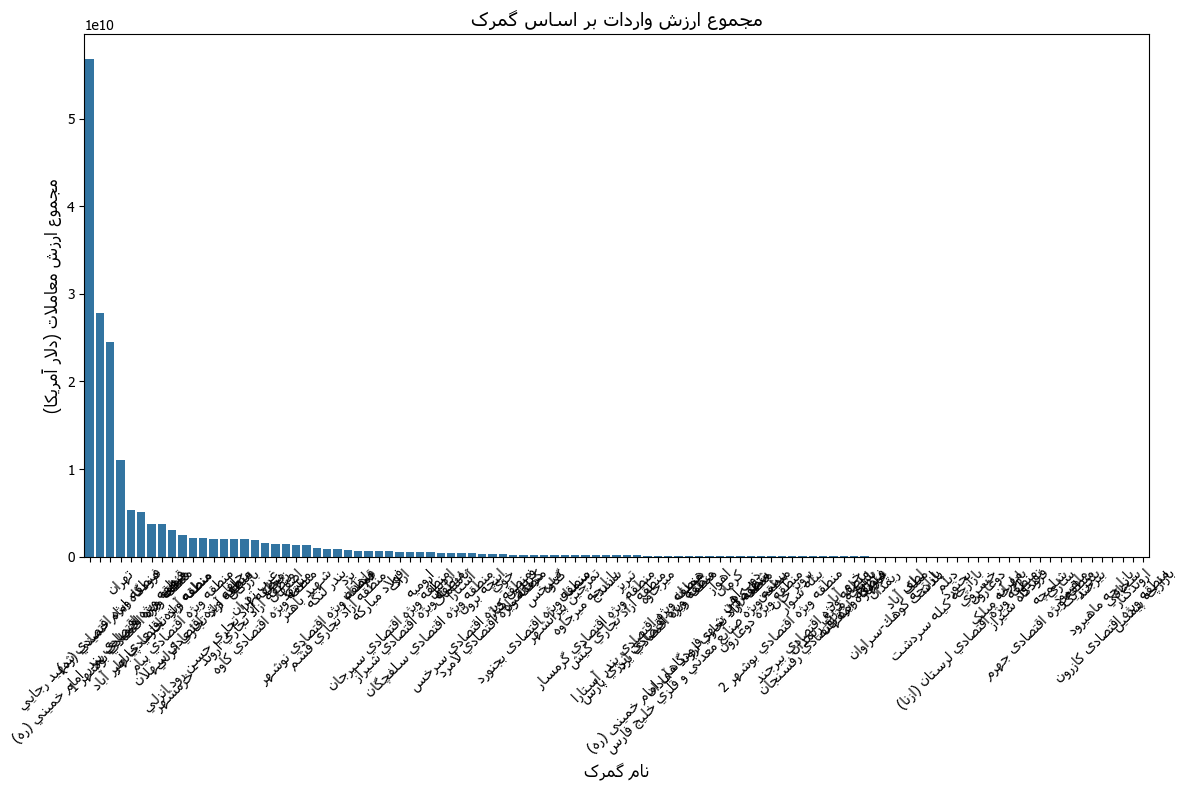

In [39]:
plot_trade_by_customs(imported_data_frames, column_name='fee(usd)', customs_column='custom_name', trade_type='واردات')


# صادرات

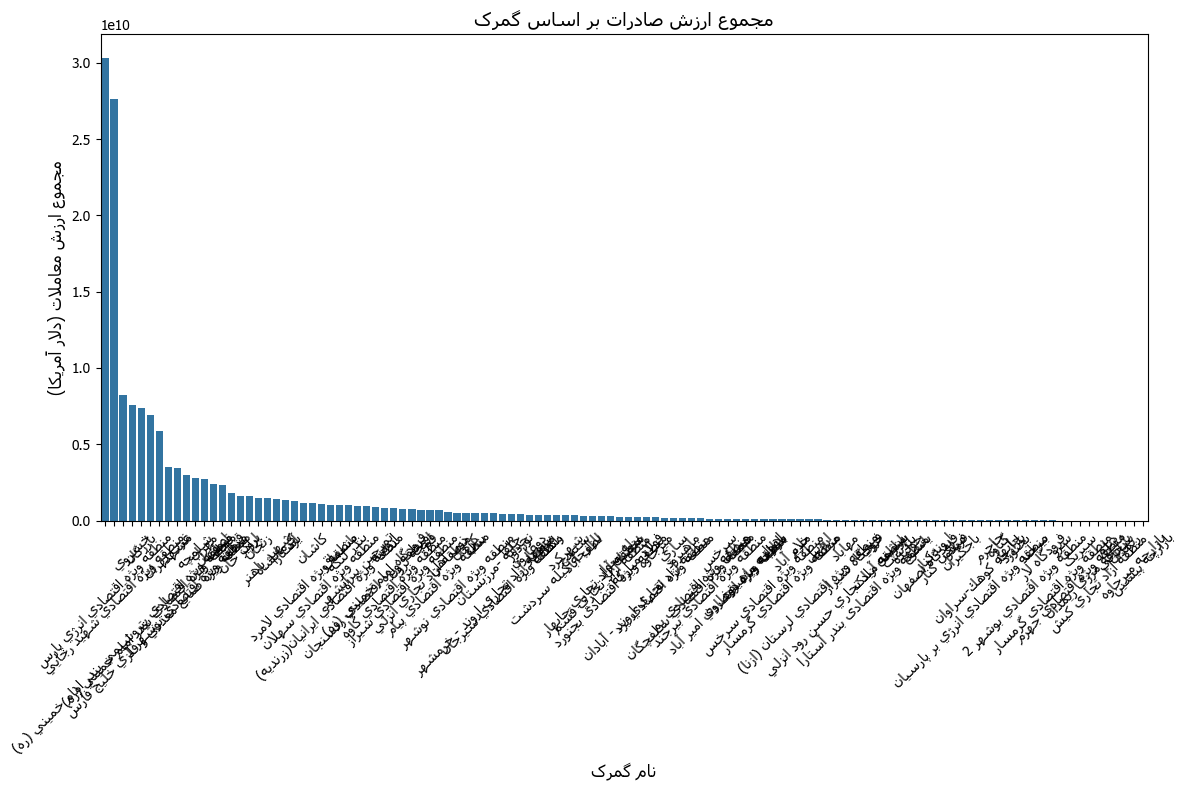

In [40]:
plot_trade_by_customs(exported_data_frames, column_name='fee(usd)', customs_column='custom_name', trade_type='صادرات')


In [46]:
def plot_trade_by_customs(data_frames, column_name, customs_column, trade_type):
    """
    رسم نمودار ارزش واردات یا صادرات بر اساس گمرک (ده گمرک برتر).
    
    :param data_frames: لیستی از DataFrameهای مربوط به واردات یا صادرات.
    :param column_name: نام ستون مربوط به مقدار معامله (مثلاً 'fee(usd)').
    :param customs_column: نام ستون مربوط به گمرک (مثلاً 'custom_name').
    :param trade_type: نوع معامله ('Import' یا 'Export').
    """
    # تنظیم فونت فارسی
    configure_farsi_font()

    # ترکیب تمام داده‌های مربوط به واردات یا صادرات
    trade_df = pd.concat(data_frames)

    # گروه‌بندی بر اساس گمرک و محاسبه مجموع ارزش معاملات
    customs_summary = (
        trade_df.groupby(customs_column)[column_name]
        .sum()
        .sort_values(ascending=False)
    )

    # انتخاب ده گمرک با بیشترین مجموع ارزش
    top_10_customs = customs_summary.head(10).reset_index()
    top_10_customs.columns = ['Custom Name', 'Total Trade Value (USD)']

    # اصلاح متون فارسی در ستون‌های DataFrame
    top_10_customs['Custom Name'] = top_10_customs['Custom Name'].apply(reshape_text)

    # رسم نمودار Bar Plot
    plt.figure(figsize=(12, 8))
    sns.barplot(
        data=top_10_customs,
        x='Custom Name',
        y='Total Trade Value (USD)',
    )

    # عنوان و برچسب‌ها به فارسی
    plt.title(reshape_text(f'مجموع ارزش {trade_type} بر اساس ده گمرک برتر'), fontsize=14)
    plt.xlabel(reshape_text('نام گمرک'), fontsize=12)
    plt.ylabel(reshape_text('مجموع ارزش معاملات (دلار آمریکا)'), fontsize=12)

    # کاهش اندازه فونت برای مقیاس‌های محور X و Y
    plt.xticks(fontsize=10, rotation=45)  
    plt.yticks(fontsize=10)

    plt.tight_layout()
    plt.show()


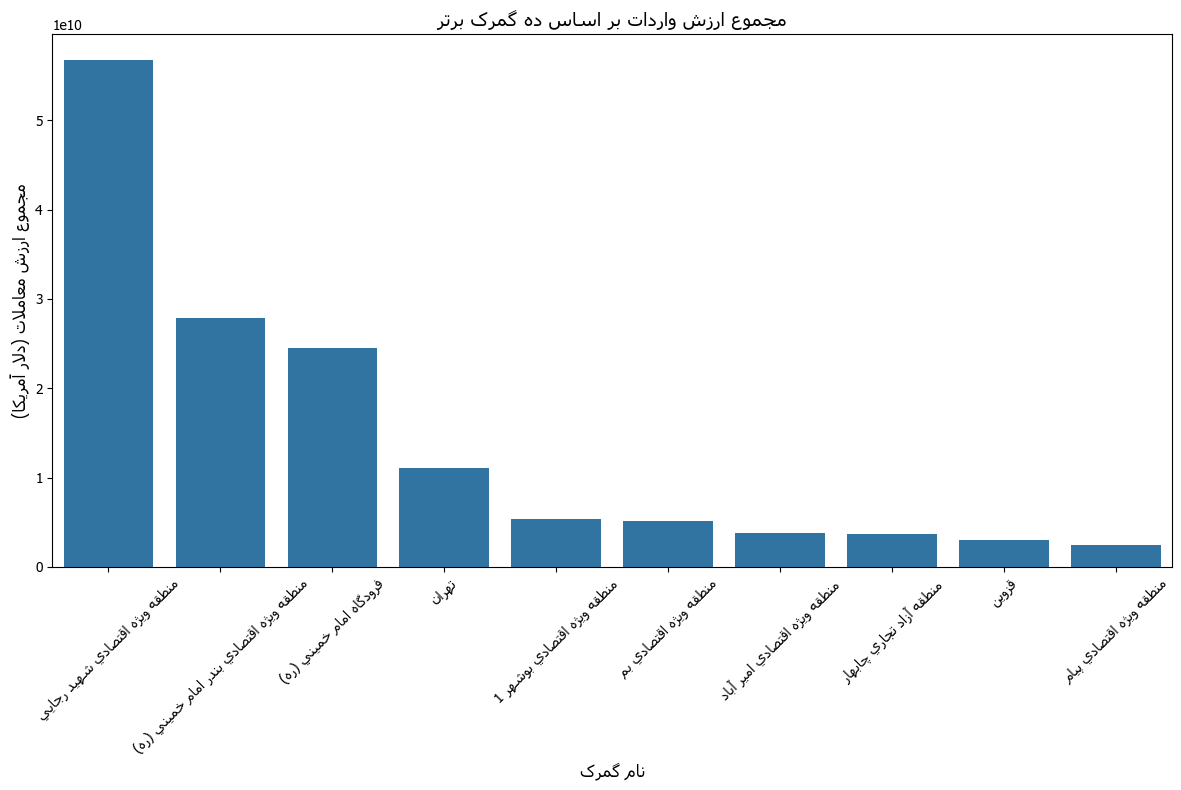

In [47]:
plot_trade_by_customs(imported_data_frames, column_name='fee(usd)', customs_column='custom_name', trade_type='واردات')


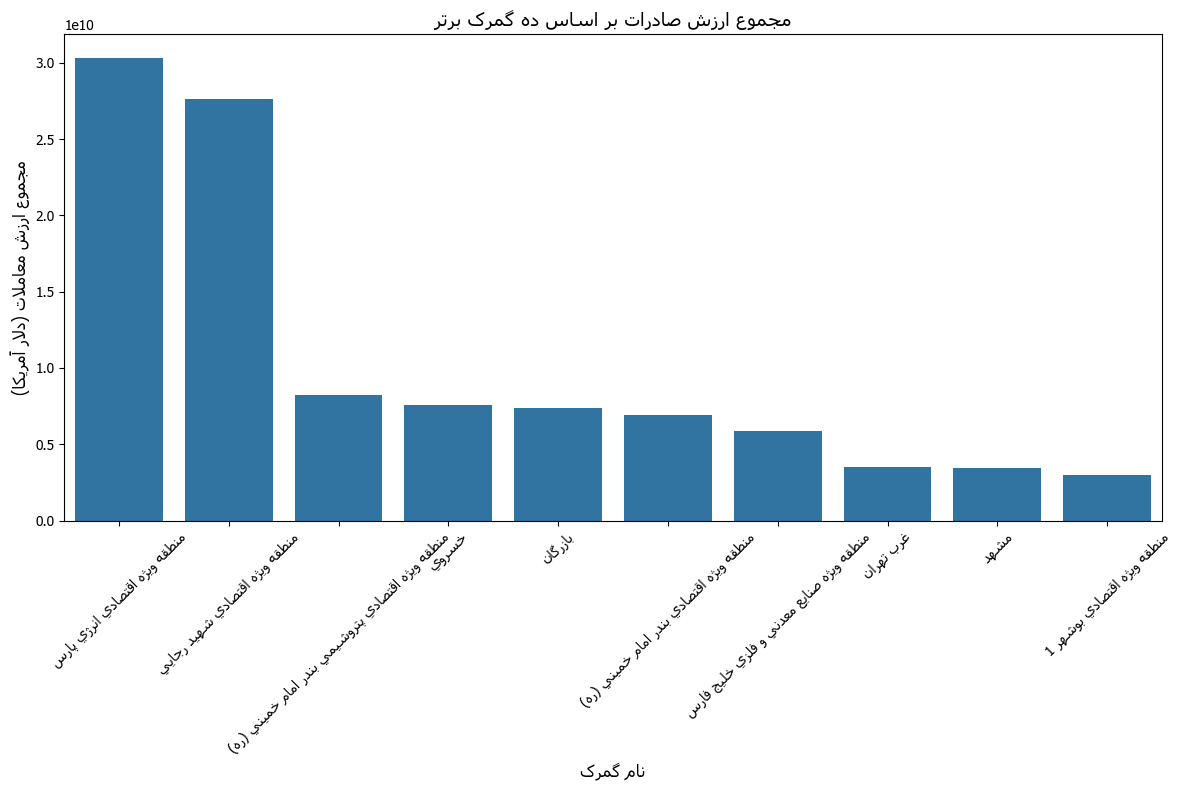

In [48]:
plot_trade_by_customs(exported_data_frames, column_name='fee(usd)', customs_column='custom_name', trade_type='صادرات')


تحلیل تجارت خارجی ایران (سال‌های 1400 تا 1402)

1. صادرات ایران در سال‌های 1400 تا 1402
سال 1402: میزان صادرات ایران حدود 138 هزار تن به ارزش دلاری 50 میلیون دلار بوده است.
سال 1401: میزان صادرات ایران حدود 124 هزار تن به ارزش 54 میلیون دلار بوده است.
سال 1400: میزان صادرات ایران حدود 123 هزار تن به ارزش 48 میلیون دلار بوده است.
تحلیل تغییرات صادرات:

مقایسه داده‌ها نشان می‌دهد که میزان صادرات در سال 1402 نسبت به سال 1401 کاهش 7 درصدی داشته است. همچنین میزان صادرات در سال 1401 نسبت به سال 1400 افزایش 11 درصدی داشته است.
این کاهش در سال 1402 ممکن است به دلیل نوسانات قیمت جهانی کالاها و تحریم‌ها باشد.


2. واردات ایران در سال‌های 1400 تا 1402
سال 1402: میزان واردات ایران حدود 40 هزار تن به ارزش دلاری 67 میلیون دلار بوده است.
سال 1401: میزان واردات ایران حدود 37 هزار تن به ارزش 60 میلیون دلار بوده است.
سال 1400: میزان واردات ایران حدود 41 هزار تن به ارزش 53 میلیون دلار بوده است.
تحلیل تغییرات واردات:

واردات در سال 1402 نسبت به سال 1401 حدود 10 درصد افزایش داشته است و در سال 1401 نسبت به 1400 نیز افزایش 10 درصدی مشاهده می‌شود.
این روند افزایشی نشان می‌دهد که نیاز به کالاهای اساسی و تولیدی بیشتر شده است و پیش‌بینی می‌شود که واردات در سال 1403 حدود 74 میلیون دلار باشد.
مدل رگرسیون خطی نیز نشان‌دهنده این روند افزایشی است.


3. تحلیل جغرافیایی و اقتصادی تجارت خارجی
واردات:
آسیا: بیشترین حجم واردات از کشورهای آسیایی به ویژه چین، هند و ترکیه است.
اروپا: در رتبه دوم قرار دارد، که به دلیل توافقات تجاری و روابط دیپلماتیک است.
صادرات:
آسیا: به عنوان بهترین بازار هدف برای ایران شناخته می‌شود، به ویژه در زمینه نفت، گاز، مواد غذایی و صنایع مختلف.
اروپا و آفریقا: در رتبه‌های بعدی قرار دارند، اما بازارهای ایرانی هنوز بیشتر به آسیا وابسته هستند.
صادرات ایران عمدتاً در مقادیر کم بوده و صادرات در مقادیر بالا نادر است.


4. روندهای احتمالی تجارت خارجی ایران
کاهش ارزش صادرات غیرنفتی: کاهش قیمت جهانی برخی کالاها و تحریم‌ها می‌تواند منجر به کاهش ارزش صادرات غیرنفتی ایران شود.
افزایش واردات کالاهای اساسی: کمبود تولید داخلی در برخی کالاها، واردات این کالاها را افزایش داده است.
تلاش برای متنوع‌سازی صادرات: ایران به دنبال کاهش وابستگی به صادرات نفت است و تلاش‌هایی برای تنوع‌بخشی به سبد صادراتی انجام شده است.
توسعه روابط تجاری با کشورهای همسایه: تحریم‌ها موجب تقویت روابط ایران با کشورهای همسایه شده است.


5. پیشنهادات برای بهبود وضعیت تجارت خارجی ایران
تنوع‌بخشی به سبد صادراتی: افزایش تولید محصولات با ارزش افزوده بالا و ارتقاء کیفیت محصولات می‌تواند به تنوع‌بخشی به صادرات ایران کمک کند.
گسترش روابط تجاری با کشورهای همسایه: تقویت روابط با کشورهای همسایه می‌تواند هزینه‌های حمل و نقل را کاهش دهد و امنیت تجاری را افزایش دهد.
توسعه زیرساخت‌ها: سرمایه‌گذاری در زیرساخت‌های حمل و نقل و انرژی می‌تواند هزینه‌های تولید را کاهش دهد و به تسهیل تجارت کمک کند.
حمایت از صادرات: ارائه تسهیلات مالی و بیمه صادرات می‌تواند رقابت‌پذیری محصولات ایرانی را افزایش دهد.
توجه به بازارهای نوظهور: ایران باید به بازارهای جدید مانند کشورهای آمریکای لاتین و آسیای مرکزی توجه کند.
تقویت دیپلماسی اقتصادی: تقویت روابط دیپلماتیک و شرکت در مذاکرات تجاری بین‌المللی می‌تواند به بهبود تجارت خارجی کمک کند.
توجه به استانداردهای بین‌المللی: تطبیق محصولات با استانداردهای بین‌المللی می‌تواند رقابت‌پذیری محصولات ایرانی را افزایش دهد.


6. خلاصه روندها و پیشنهادات
کاهش صادرات در سال 1402: کاهش 7 درصدی صادرات در سال 1402 نسبت به سال 1401 قابل توجه است. این کاهش باید مدیریت شود، به خصوص در مواجهه با افزایش واردات.
افزایش واردات: واردات در سال 1402 حدود 10 درصد افزایش یافته است، که پیش‌بینی می‌شود این روند در سال 1403 ادامه یابد.
تنوع‌بخشی به سبد صادراتی: کاهش وابستگی به صادرات نفت و گاز و گسترش صادرات کالاهای با ارزش افزوده بالا، می‌تواند ایران را در برابر نوسانات جهانی مقاوم‌تر کند.
گسترش روابط تجاری با کشورهای همسایه: این موضوع می‌تواند به کاهش هزینه‌ها و افزایش امنیت تجاری کمک کند.
اهمیت قاره آسیا: آسیا همچنان بزرگترین شریک تجاری ایران است و توسعه روابط تجاری با این قاره باید در اولویت باشد.
تقویت زیرساخت‌ها و دیپلماسی اقتصادی: سرمایه‌گذاری در زیرساخت‌ها و تقویت روابط دیپلماتیک می‌تواند به تسهیل تجارت و افزایش صادرات کمک کند.


7. تحلیل شرکای تجاری ایران در سال 1401
واردات از 5 کشور برتر:
چین
امارات متحده عربی
ترکیه
هند
آلمان
صادرات به 5 کشور برتر:
چین
عراق
ترکیه
امارات متحده عربی
هند
تحلیل اولیه:

تسلط چین: چین به عنوان بزرگترین شریک تجاری ایران نقش بسیار مهمی ایفا می‌کند.
اهمیت منطقه: کشورهای همسایه مانند عراق، ترکیه و امارات متحده عربی، از شرکای تجاری مهم ایران هستند.
تأثیر تحریم‌ها: تحریم‌ها روابط تجاری ایران با برخی کشورها را تحت تأثیر قرار داده است.


پیشنهادات برای آینده:


تنوع‌بخشی به شرکای تجاری: ایران باید به دنبال گسترش روابط تجاری با کشورهای بیشتر و توسعه روابط تجاری با بازارهای نوظهور باشد.
توسعه صادرات خدمات: توجه به صادرات خدمات به ویژه در زمینه‌های فناوری و خدمات فنی می‌تواند به افزایش تنوع در صادرات کمک کند.
حمایت از تولیدکنندگان داخلی: حمایت از تولیدکنندگان داخلی می‌تواند به بهبود کیفیت محصولات و رقابت‌پذیری آن‌ها در بازارهای جهانی کمک کند.
این تحلیل‌ها و پیشنهادات می‌تواند به تصمیم‌گیری‌های راهبردی در خصوص تجارت خارجی ایران و توسعه روابط تجاری در سال‌های آینده کمک کند.
